In [1]:
# the object at the heart of Qiskit is the quantum circuit
from qiskit import QuantumCircuit
qc = QuantumCircuit()

In [2]:
# Quantum register
from qiskit import QuantumRegister
qr = QuantumRegister(2, 'a') # 'a' is a label - optional

In [3]:
# add the register to the qc, using add_register method and 
# than checking with qregs varible

qc.add_register(qr)

qc.qregs

[QuantumRegister(2, 'a')]

In [4]:
qc.draw()

a_0: 
     
a_1:

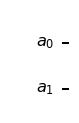

In [5]:
qc.draw(output='mpl')
# the qubits are in the state |0>

In [6]:
# applying gates
qc.h(qr[0])

In [7]:
# apply a CNOT gate
qc.cx(qr[0], qr[1]);

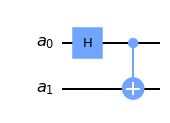

In [8]:
qc.draw(output='mpl')

In [9]:
# Statevector simulator
# we will use the 'statevector simulator' to see what is happeing
# to the state vector of the 2 qubits

from qiskit import Aer
sv_sim = Aer.get_backend('statevector_simulator')

# we use 'backend' to refer to the things on which quantum programs
# actually run(simulators or real quantum devices)

In [10]:
for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [11]:
# we use the '.run()' method of the backend we want to use (in this case
# a simulator) to run the experiment.

from qiskit import assemble
qobj = assemble(qc)
job = sv_sim.run(qobj)

In [12]:
# extract the result, specifically we want the state vector

ket = job.result().get_statevector()
for amplitude in ket:
    print(amplitude)
    
# this is the vector for a Bell state (|00> + |11>/sqrt(2))

(0.7071067811865476+0j)
0j
0j
(0.7071067811865476+0j)


In [13]:
# it is possible to initialize a circuit with an arbitrary pure state

new_qc = QuantumCircuit(qr)

new_qc.initialize(ket, qr);

In [14]:
# Classical registers and the qsam simulator
# in the above simulation. we got out a statevector. that's not what we get from
# a real quantum computer. For that we need a measurement. And to handle measurement
# we need to define where the results will go.
# This is done with a 'ClassicalRegister'

from qiskit import ClassicalRegister
cr = ClassicalRegister(2, 'creg')

qc.add_register(cr)

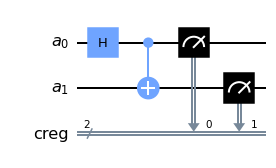

In [15]:
# Let's measure both qubits, and write their results in different bits.

qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])

qc.draw(output='mpl')

In [16]:
# we can run on a lcal simulator
# need to add 'shots' input to the 'assemble' function
# default value is 1024

qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc, shots=8192)
job = qasm_sim.run(qobj)

In [17]:
# results are essentially a histogram in the form of a Python dictionary

hist = job.result().get_counts()
print(hist)

{'00': 4179, '11': 4013}


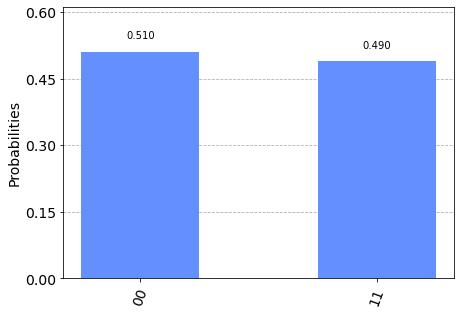

In [18]:
from qiskit.visualization import plot_histogram

plot_histogram(hist)

In [20]:
# for compatible backends we can also ask for and get the ordered list of results

qobj = assemble(qc, shots=10)
job = qasm_sim.run(qobj, memory=True)
samples = job.result().get_memory()
print(samples)

['00', '00', '11', '00', '00', '00', '00', '00', '11', '11']


In [21]:
qubit = QuantumRegister(8)
bit = ClassicalRegister(8)
qc_2 = QuantumCircuit(qubit, bit)

qc_2.x(qubit[7])
qc_2.measure(qubit,bit) # this is a way to do all the qc.measure(qr8[j],cr8[j]) at once

qobj = assemble(qc_2, shots=8192)
qasm_sim.run(qobj).result().get_counts()

# the string we get in our result is the binary for 2^7 because it has
# a 1 for the bit numbered 7.

{'10000000': 8192}

In [22]:
# Simplified notation

qc = QuantumCircuit(3)

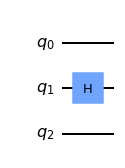

In [24]:
qc.h(1)
qc.draw(output='mpl')

In [25]:
qc = QuantumCircuit(2,1)

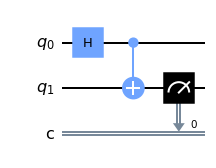

In [26]:
qc.h(0)
qc.cx(0,1)
qc.measure(1,0)

qc.draw(output='mpl')

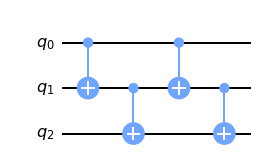

In [27]:
# Creating custom gates

sub_circuit = QuantumCircuit(3, name='toggle_cx')
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)

sub_circuit.draw(output='mpl')

In [28]:
# we can now turn this into a gate

toggle_cx = sub_circuit.to_instruction()

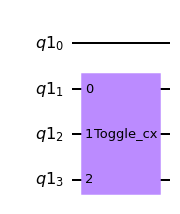

In [29]:
# insert into other circuits
qr = QuantumRegister(4)
new_qc = QuantumCircuit(qr)

new_qc.append(toggle_cx, [qr[1],qr[2],qr[3]])

new_qc.draw(output='mpl')

In [30]:
# Accessing on real quantum hardware

from qiskit import IBMQ
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [31]:
# see what additional backends are available

provider = IBMQ.get_provider(hub='ibm-q')
for backend in provider.backends():
    print(backend)

ibmq_qasm_simulator
ibmqx2
ibmq_16_melbourne
ibmq_armonk
ibmq_athens
ibmq_santiago
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer


In [32]:
# we can see what they are up to with the 'status()' method

for backend in provider.backends():
    print(backend.status().to_dict())

{'backend_name': 'ibmq_qasm_simulator', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 3, 'status_msg': 'active'}
{'backend_name': 'ibmqx2', 'backend_version': '2.3.4', 'operational': False, 'pending_jobs': 2069, 'status_msg': 'maintenance'}
{'backend_name': 'ibmq_16_melbourne', 'backend_version': '2.3.14', 'operational': True, 'pending_jobs': 8311, 'status_msg': 'active'}
{'backend_name': 'ibmq_armonk', 'backend_version': '2.4.3', 'operational': True, 'pending_jobs': 25, 'status_msg': 'active'}
{'backend_name': 'ibmq_athens', 'backend_version': '1.3.13', 'operational': True, 'pending_jobs': 6491, 'status_msg': 'active'}
{'backend_name': 'ibmq_santiago', 'backend_version': '1.3.14', 'operational': True, 'pending_jobs': 5030, 'status_msg': 'active'}
{'backend_name': 'ibmq_lima', 'backend_version': '1.0.5', 'operational': True, 'pending_jobs': 7, 'status_msg': 'active'}
{'backend_name': 'ibmq_belem', 'backend_version': '1.0.3', 'operational': True, 'pending_jobs': 17,

In [33]:
real_device = provider.get_backend('ibmq_16_melbourne')

In [34]:
propoerties = real_device.properties()
coupling_map = real_device.configuration().coupling_map

In [35]:
# from this we can construct a noise model to mimic the noise on the device

from qiskit.test.mock import FakeAthens
athens = FakeAthens()

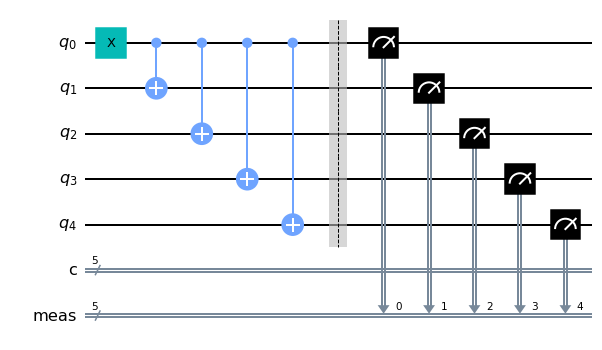

In [36]:
# run the job on the emulator, with it repdoucing all these features of the real device

qc = QuantumCircuit(5,5)
qc.x(0)

for q in range(4):
    qc.cx(0,q+1)
    
qc.measure_all()
qc.draw(output='mpl')

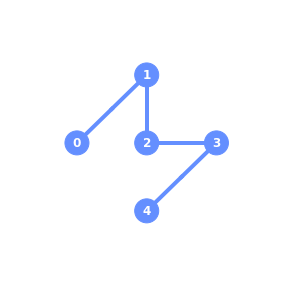

In [37]:
from qiskit.visualization import plot_gate_map
plot_gate_map(athens)

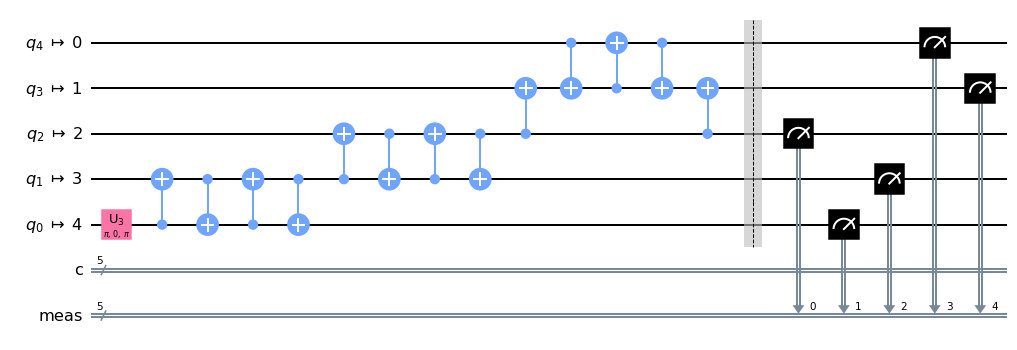

In [38]:
from qiskit import transpile
t_qc = transpile(qc, athens)
t_qc.draw(output='mpl')

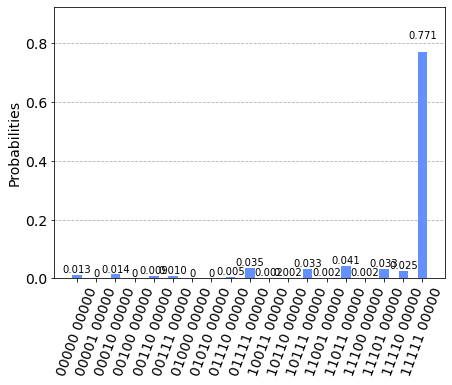

In [39]:
qobj = assemble(t_qc)
counts = athens.run(qobj).result().get_counts()
plot_histogram(counts)

In [40]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.6',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.12.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.24.0'}